#### Logistic Regression model Performance improvement applying Feature Selection

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import Libraries
- Pandas for reading the data
- Seaborn and Matplotlib for Visialization
- Sklearn for model initialization and implementing Feature Selection methods

#### Read the data

In [3]:
df = pd.read_csv("./data/cell_samples.csv")
df.head(2)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


##### Let's explore basic Statical Analysis


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
UnifSize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
UnifShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MargAdh,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
SingEpiSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
BlandChrom,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
NormNucl,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mit,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [6]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

#### Since we dont have any null values , we can immediately jump to visualing the data distibution

#### Converting only object data type column to numberic

In [13]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [11]:
df["Class"] = df["Class"].apply(lambda x: 0 if x==2 else 1)

In [12]:
X= df.drop("Class", axis=1)
y =df["Class"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)
 
y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)

lr_acc

C:\Users\baxti\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.927007299270073

In [18]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train_v1)
scaled_X_test = scaler.fit_transform(X_test_v1)


In [24]:
scaled_X_train.var(axis=0)

array([0.00205624, 0.09403122, 0.11508703, 0.11353854, 0.10064489,
       0.05852478, 0.16243772, 0.06999993, 0.10721342, 0.03285307])

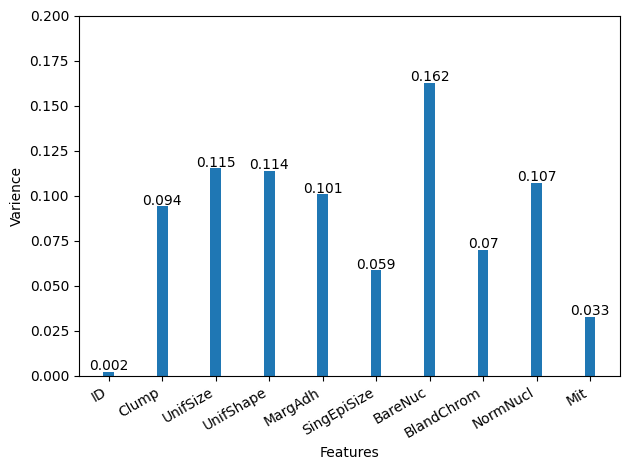

In [32]:
fig,ax = plt.subplots()

x = X.columns
y = scaled_X_train.var(axis=0)


ax.bar(x, y, width=0.2)
ax.set_xlabel("Features")
ax.set_ylabel("Varience")
ax.set_ylim(0, 0.2)

for i, val in enumerate(y):
    plt.text(x=i, y=val+0.001, s=str(round(val, 3)), ha="center")

fig.autofmt_xdate()
plt.tight_layout()

In [33]:
sel_X_train = X_train_v1.drop(["ID", "Mit"], axis=1)
sel_X_test = X_test_v1.drop(["ID", "Mit"], axis=1)

In [38]:

lr.fit(sel_X_train, y_train_v1)

y_pred = lr.predict(sel_X_test)

accuracy_score(y_test_v1, y_pred)

0.9562043795620438

##### Report
- By implementing the classic Varience Threshold Feature Seletion, model's performance increased to around 3 %